In [1]:
import matplotlib
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
 # Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
# Create engine
engine = create_engine("sqlite:///hawaii.sqlite")

In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

In [7]:
# reflect an existing database into a new model, # reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
# Display the row's columns and data in dictionary format for measurement table
first_row_m = session.query(Measurement).first()
first_row_m.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ecf8634e50>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
# Display the row's columns and data in dictionary format for station table
first_row_s = session.query(Station).first()
first_row_s.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1ecf8652c70>,
 'elevation': 3.0,
 'latitude': 21.2716,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'longitude': -157.8168,
 'station': 'USC00519397'}

In [13]:
# Use `engine.execute` to select and display rows from the measurement table and order by descending order to see last values
engine.execute('SELECT * FROM measurement ORDER BY date DESC').fetchall()

[(2724, 'USC00519397', '2017-08-23', 0.0, 81.0),
 (7635, 'USC00514830', '2017-08-23', 0.0, 82.0),
 (12187, 'USC00519523', '2017-08-23', 0.08, 82.0),
 (19550, 'USC00516128', '2017-08-23', 0.45, 76.0),
 (2723, 'USC00519397', '2017-08-22', 0.0, 82.0),
 (12186, 'USC00519523', '2017-08-22', 0.0, 82.0),
 (19549, 'USC00516128', '2017-08-22', 0.5, 76.0),
 (2722, 'USC00519397', '2017-08-21', 0.0, 81.0),
 (7634, 'USC00514830', '2017-08-21', 0.02, 79.0),
 (12185, 'USC00519523', '2017-08-21', None, 82.0),
 (19548, 'USC00516128', '2017-08-21', 0.56, 76.0),
 (2721, 'USC00519397', '2017-08-20', 0.0, 81.0),
 (7633, 'USC00514830', '2017-08-20', 0.01, 80.0),
 (19547, 'USC00516128', '2017-08-20', None, 78.0),
 (2720, 'USC00519397', '2017-08-19', 0.0, 79.0),
 (7632, 'USC00514830', '2017-08-19', 0.0, 80.0),
 (12184, 'USC00519523', '2017-08-19', None, 85.0),
 (19546, 'USC00516128', '2017-08-19', 0.09, 71.0),
 (2719, 'USC00519397', '2017-08-18', 0.0, 80.0),
 (7631, 'USC00514830', '2017-08-18', 0.0, 77.0),
 (

In [14]:
# Use `engine.execute` to select and display rows from the station table
engine.execute('SELECT * FROM station').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

#  Exploratory Climate Analysis 

# Step 1

Precipitation Analysis

In [15]:
# Calculate the date 1 year ago from the last data point in the database
date_2016 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("The date 1 year from the last data point in the database:", date_2016)

The date 1 year from the last data point in the database: 2016-08-23


In [29]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# prcp_12mo = session.query(Measurement.date, Measurement.prcp).all()
prcp_12mo = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.prcp).\
    order_by(Measurement.date).all()
prcp_12mo

[('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.02),
 ('2016-09-02',

In [30]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date

prcp_df = pd.DataFrame(prcp_12mo, columns=['Date', 'Prcp'])
prcp_df.set_index('Date', inplace=True, )
prcp_df.head(10)

,Prcp
Date,
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,0.02
2016-08-23,1.79
2016-08-23,0.70
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,1.22


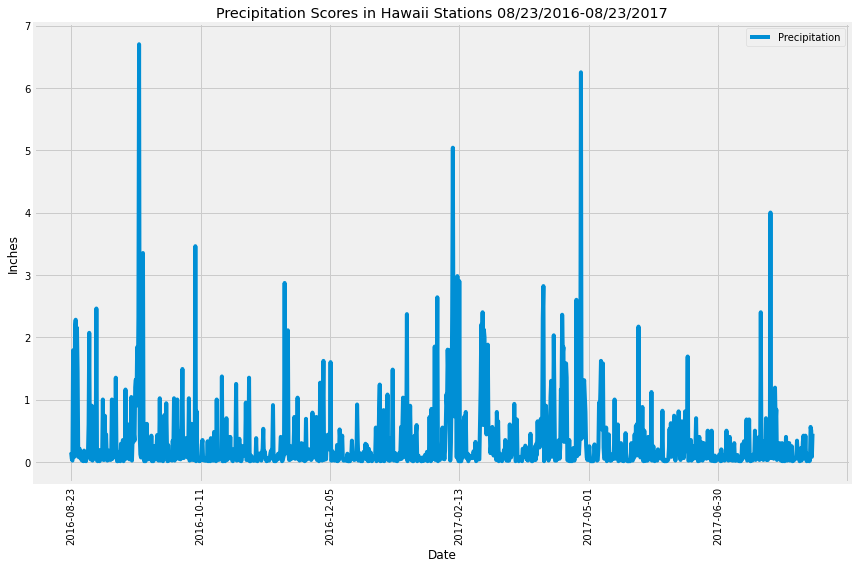

In [38]:
# Use Pandas Plotting with Matplotlib to plot the data
# # Make a list of dates in DataFrame
# date_list = [result[0] for result in prcp_12mo]
# date_list

# # Create a list of unique dates for plot xtick marks
# date_list_unique = [prcp_df.index.unique()]
# date_list_unique

# # Make a list of precipitation scores in DataFrame
# prcp_list = [result[1] for result in prcp_12mo]
# prcp_list

# # Create a list of unique precipitation scores for plot ytick marks
# prcp_list_unique = [prcp_df['Prcp'].unique()]
# prcp_list_unique

prcp_df.plot(kind="line",figsize=(12,8),title='Precipitation Scores in Hawaii Stations 08/23/2016-08/23/2017',stacked=True,fontsize=10)
plt.ylabel("Inches")
plt.legend(['Precipitation'],loc='best')
plt.xticks(rotation='vertical')
plt.grid(b=True)
plt.tight_layout()
plt.show()

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_prcp_df = prcp_df.describe()
summary_prcp_df

,Prcp
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


Station Analysis

In [20]:
# Design a query to show how many stations are available in this dataset?
stations_count = session.query(Station).filter(Station.id).count()
print(f'There are {stations_count} stations in this dataset.')

There are 9 stations in this dataset.


In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations

print(f'The most activate stations and their counts (in descending order) are: {active_stations}')

The most activate stations and their counts (in descending order) are: [('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [22]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
lowest_tob = session.query(func.min(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
lowest_tob

min_temp = [x[0] for x in lowest_tob][0]
min_temp

print(f'The lowest temperature recorded at the USC00519281 station is: {min_temp}')

The lowest temperature recorded at the USC00519281 station is: 54.0


In [23]:
highest_tob = session.query(func.max(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
highest_tob

max_temp = [x[0] for x in highest_tob][0]
max_temp

print(f'The highest temperature recorded at the USC00519281 station is: {max_temp}')

The highest temperature recorded at the USC00519281 station is: 85.0


In [24]:
avg_tob = session.query(func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
avg_tob

mean_temp = [x[0] for x in avg_tob][0]
mean_temp

print(f'The average temperature at the USC00519281 station is: {mean_temp}')

The average temperature at the USC00519281 station is: 71.66378066378067


2016-08-23


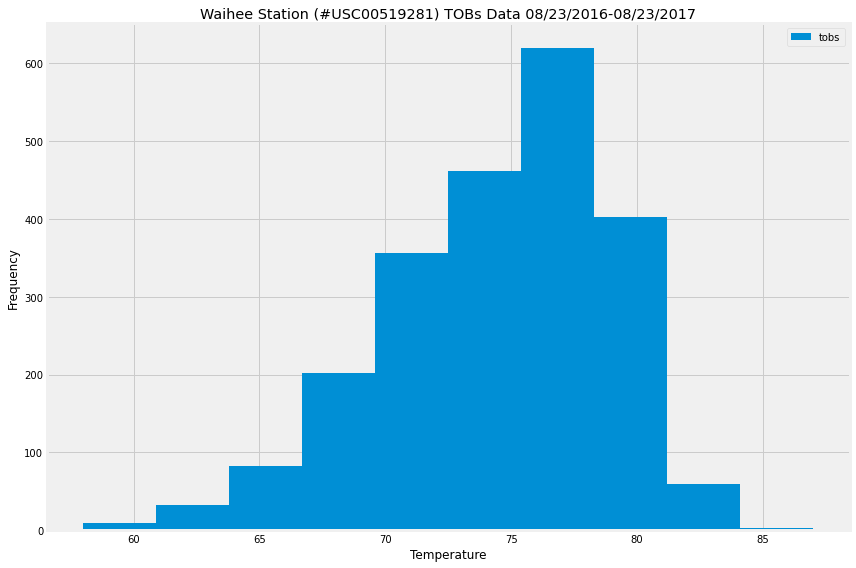

In [37]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

USC00519281_2016 = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(USC00519281_2016)

USC00519281_12mo = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.tobs).\
    filter(Measurement.date >= '2016-08-23').\
    order_by(Measurement.date.desc()).all()
USC00519281_12mo

USC00519281_df = pd.DataFrame(USC00519281_12mo, columns=['Date', 'TOBs'])
USC00519281_df.set_index('Date', inplace=True, )
USC00519281_df.head(10)

# STILL NEED TO BIN

USC00519281_df.plot(kind="hist",figsize=(12,8),title='Waihee Station (#USC00519281) TOBs Data 08/23/2016-08/23/2017',stacked=True,fontsize=10)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.legend(['tobs'],loc='best')
plt.grid(b=True)
plt.tight_layout()
plt.show()

# Step 2

Climate App